Extract features from the considered datasets

In [1]:
import librosa
import os
import numpy as np
import pandas as pd

# Import metadata

In [2]:
ravdess = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/ravdess/processed_metadata.csv")
emovo = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emovo/processed_metadata.csv")
emodb = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emodb/processed_metadata.csv")

In [3]:
samples, sample_rate = librosa.load(emodb.path[0], sr=None)
sample_rate

16000

In [4]:
samples, sample_rate = librosa.load(emovo.path[0], sr=None)
sample_rate

48000

In [5]:
samples, sample_rate = librosa.load(ravdess.path[0], sr=None)
sample_rate

48000

# Extract a sample

In [6]:
sr1 = 22050
sr2 = 16000

In [7]:
emovo

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,happy,m3,m,5.205351
1,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-b3.wav,happy,m3,m,1.877370
2,/datasets/nicolas_facchinetti/emovo/data/m3/pa...,pau-m3-n5.wav,fear,m3,m,4.394694
3,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-b2.wav,sad,m3,m,2.773333
4,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-l4.wav,sad,m3,m,3.370703
...,...,...,...,...,...,...
583,/datasets/nicolas_facchinetti/emovo/data/m2/di...,dis-m2-b3.wav,disgust,m2,m,2.474694
584,/datasets/nicolas_facchinetti/emovo/data/m2/so...,sor-m2-d1.wav,surprised,m2,m,2.090703
585,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,fear,m2,m,1.962676
586,/datasets/nicolas_facchinetti/emovo/data/m2/tr...,tri-m2-n2.wav,sad,m2,m,2.368027


In [8]:
emovo.loc[emovo['gender'] == 'f']

,path,filename,label,actor,gender,length
98,/datasets/nicolas_facchinetti/emovo/data/f1/tr...,tri-f1-l4.wav,sad,f1,f,3.157370
99,/datasets/nicolas_facchinetti/emovo/data/f1/tr...,tri-f1-n5.wav,sad,f1,f,4.864036
100,/datasets/nicolas_facchinetti/emovo/data/f1/ne...,neu-f1-n5.wav,neutral,f1,f,3.925351
101,/datasets/nicolas_facchinetti/emovo/data/f1/pa...,pau-f1-n2.wav,fear,f1,f,3.754694
102,/datasets/nicolas_facchinetti/emovo/data/f1/pa...,pau-f1-b1.wav,fear,f1,f,1.877370
...,...,...,...,...,...,...
387,/datasets/nicolas_facchinetti/emovo/data/f3/di...,dis-f3-l2.wav,disgust,f3,f,5.045351
388,/datasets/nicolas_facchinetti/emovo/data/f3/gi...,gio-f3-b3.wav,happy,f3,f,2.197370
389,/datasets/nicolas_facchinetti/emovo/data/f3/ne...,neu-f3-d2.wav,neutral,f3,f,1.290703
390,/datasets/nicolas_facchinetti/emovo/data/f3/di...,dis-f3-d1.wav,disgust,f3,f,2.058685


In [9]:
example_audio = emovo.path[391]

# Example fetures extraction 1 - sr:22050

In [10]:
samples, sample_rate = librosa.load(example_audio, sr=sr1)

In [11]:
sample_rate

22050

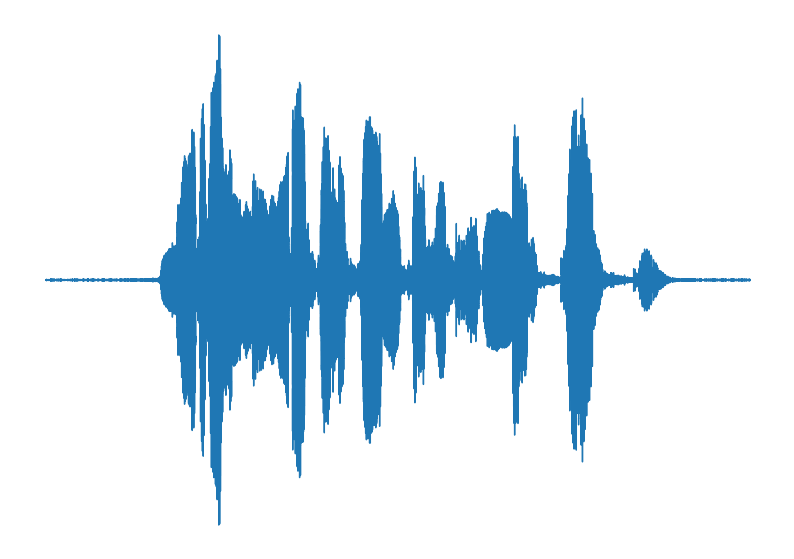

In [12]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(samples, sr=sr1)

In [13]:
import IPython
IPython.display.Audio(samples, rate=sr1)

/tmp/ipykernel_99516/2379148590.py:2: FutureWarning: Pass y=[-3.0824820e-05  9.8051431e-05 -6.7353835e-06 ... -2.0667461e-04
 -3.2142689e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr1, n_fft=2048, hop_length=512, n_mels=128)


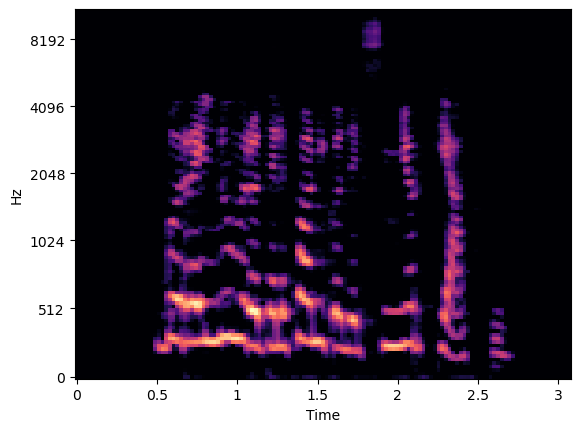

In [14]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr1, n_fft=2048, hop_length=512, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr1, n_fft=2048, hop_length=512, x_axis='time', y_axis='mel')

# Example fetures extraction 2 - sr:16000

In [15]:
samples, sample_rate = librosa.load(example_audio, sr=sr2)

In [16]:
sample_rate

16000

In [17]:
import IPython
IPython.display.Audio(samples, rate=sr2)

/tmp/ipykernel_99516/3857531491.py:2: FutureWarning: Pass y=[ 2.3503806e-05  3.5237143e-05  4.9122093e-05 ... -1.4327002e-04
 -1.7916724e-04 -6.1921572e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=2048, hop_length=512, n_mels=128)


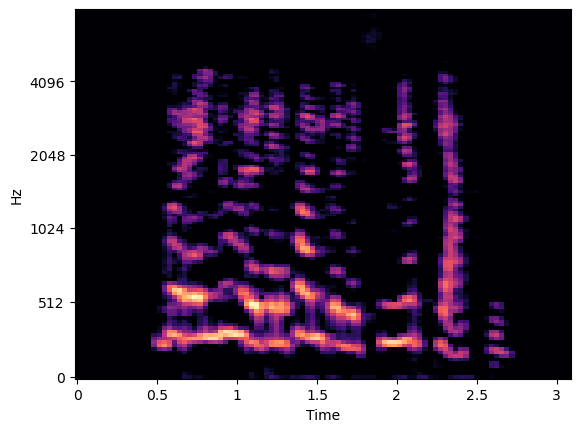

In [18]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=2048, hop_length=512, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr2, n_fft=2048, hop_length=512, x_axis='time', y_axis='mel')

# Example fetures extraction 3 - n_ftt tweaking, reduced

In [19]:
samples, sample_rate = librosa.load(example_audio, sr=sr2)

In [20]:
sample_rate

16000

In [21]:
import IPython
IPython.display.Audio(samples, rate=sr2)

/tmp/ipykernel_99516/3175251863.py:2: FutureWarning: Pass y=[ 2.3503806e-05  3.5237143e-05  4.9122093e-05 ... -1.4327002e-04
 -1.7916724e-04 -6.1921572e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=512, hop_length=128, n_mels=128)


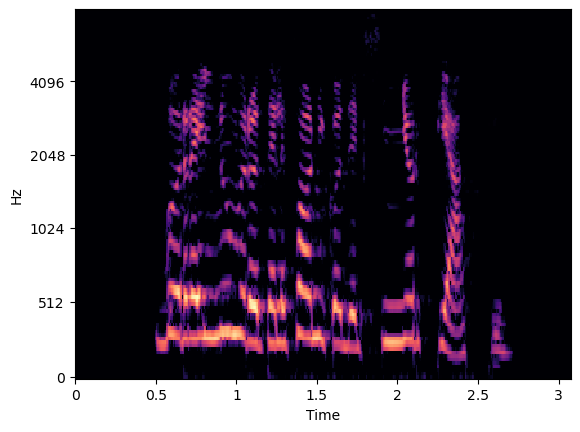

In [22]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=512, hop_length=128, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr2, n_fft=512, hop_length=128,  x_axis='time', y_axis='mel')

# Example fetures extraction 4 - n_ftt 2, window lenght 23ms

In [23]:
samples, sample_rate = librosa.load(example_audio, sr=sr2)

In [24]:
sample_rate

16000

In [25]:
import IPython
IPython.display.Audio(samples, rate=sr2)

/tmp/ipykernel_99516/3228577205.py:2: FutureWarning: Pass y=[ 2.3503806e-05  3.5237143e-05  4.9122093e-05 ... -1.4327002e-04
 -1.7916724e-04 -6.1921572e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=368, hop_length=92, n_mels=128)


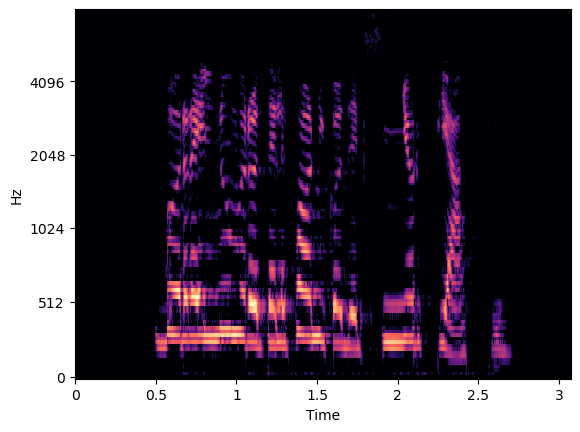

In [26]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=368, hop_length=92, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr2, n_fft=368, hop_length=92, x_axis='time', y_axis='mel')

# Example feature extraction 5 - sr 12000, window 23ms

In [27]:
sr3 = 12000

In [28]:
samples, sample_rate = librosa.load(example_audio, sr=sr3)

In [29]:
sample_rate

12000

In [30]:
import IPython
IPython.display.Audio(samples, rate=sr3)

/tmp/ipykernel_99516/4274550604.py:2: FutureWarning: Pass y=[-1.35840810e-06  6.80859375e-05 -1.00326888e-05 ... -1.21951925e-04
 -1.46868391e-04 -1.28028318e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr3, n_fft=276, hop_length=69, n_mels=128)
/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


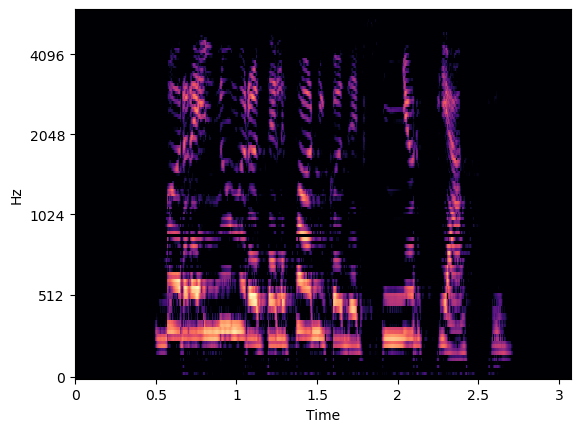

In [31]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr3, n_fft=276, hop_length=69, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr3, n_fft=276, hop_length=69, x_axis='time', y_axis='mel')

# Example feature extraction 5 - sr 12000

In [32]:
sr4 = 8000

In [33]:
samples, sample_rate = librosa.load(example_audio, sr=sr4)

In [34]:
sample_rate

8000

In [35]:
import IPython
IPython.display.Audio(samples, rate=sr4)

/tmp/ipykernel_99516/2212739272.py:2: FutureWarning: Pass y=[ 2.1071939e-05  3.0009725e-05 -1.2456771e-06 ... -6.6720750e-05
 -1.0412499e-04 -1.5519680e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr4, n_fft=184, hop_length=46, n_mels=128)


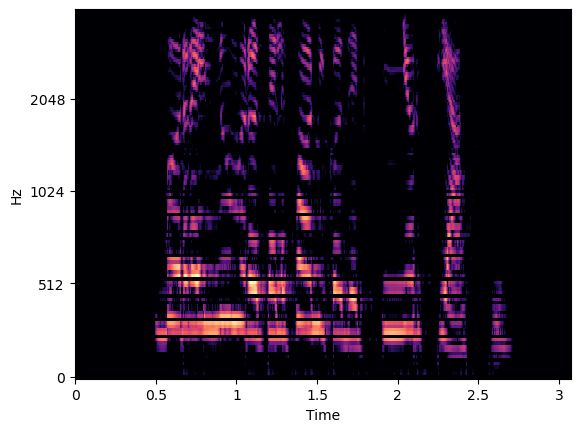

In [36]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr4, n_fft=184, hop_length=46, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr4, n_fft=184, hop_length=46, x_axis='time', y_axis='mel')

# Comparing plots

/tmp/ipykernel_99516/83572279.py:6: FutureWarning: Pass y=[ 2.3503806e-05  3.5237143e-05  4.9122093e-05 ... -1.4327002e-04
 -1.7916724e-04 -6.1921572e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=512, hop_length=128, n_mels=128)
/tmp/ipykernel_99516/83572279.py:14: FutureWarning: Pass y=[ 2.3503806e-05  3.5237143e-05  4.9122093e-05 ... -1.4327002e-04
 -1.7916724e-04 -6.1921572e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=368, hop_length=92, n_mels=128)
/tmp/ipykernel_99516/83572279.py:22: FutureWarning: Pass y=[-1.35840810e-06  6.80859375e-05 -1.00326888e-05 ... -1.21951925e-04
 -1.46868391e-04 -1.28028318e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = lib

[Text(0.5, 1.0, 'sr 8000, wl 23ms')]

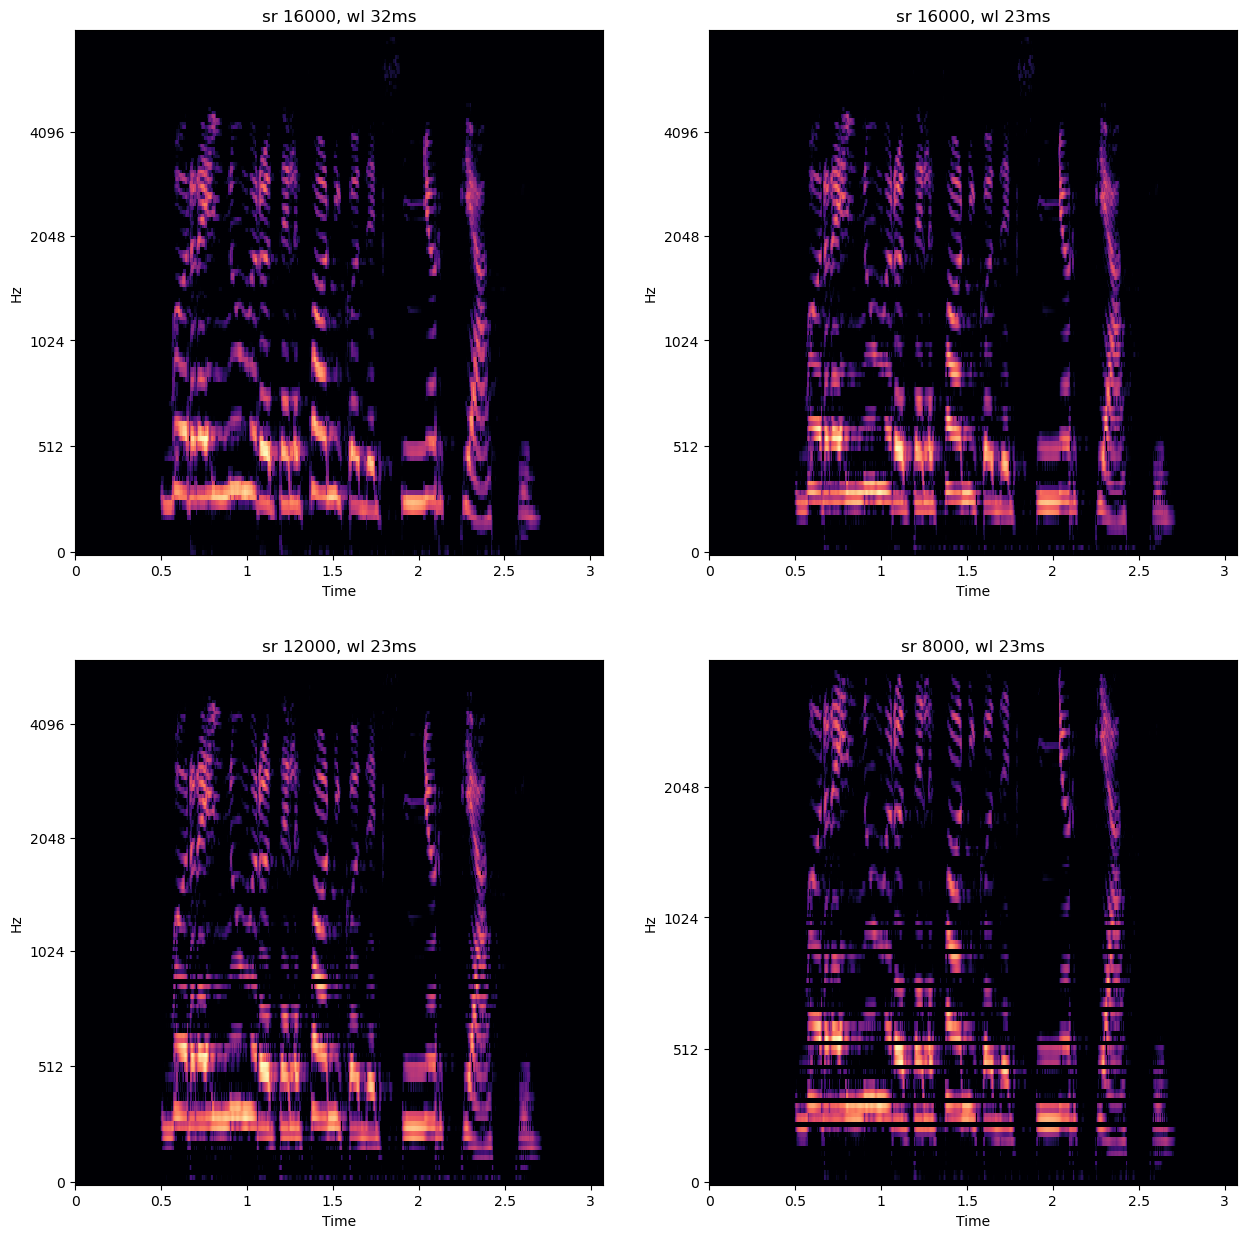

In [49]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

samples, sample_rate = librosa.load(example_audio, sr=sr2)
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=512, hop_length=128, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr2, n_fft=512, hop_length=128,  x_axis='time', y_axis='mel', ax=ax1)
ax1.set(title='sr 16000, wl 32ms')

samples, sample_rate = librosa.load(example_audio, sr=sr2)
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr2, n_fft=368, hop_length=92, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr2, n_fft=368, hop_length=92, x_axis='time', y_axis='mel', ax=ax2)
ax2.set(title='sr 16000, wl 23ms')

samples, sample_rate = librosa.load(example_audio, sr=sr3)
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr3, n_fft=276, hop_length=69, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr3, n_fft=276, hop_length=69, x_axis='time', y_axis='mel', ax=ax3)
ax3.set(title='sr 12000, wl 23ms')

samples, sample_rate = librosa.load(example_audio, sr=sr4)
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sr4, n_fft=184, hop_length=46, n_mels=128)
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sr4, n_fft=184, hop_length=46, x_axis='time', y_axis='mel', ax=ax4)
ax4.set(title='sr 8000, wl 23ms')
